In [402]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [403]:
import pandas as pd


df=pd.read_csv(path+'heart.csv')

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [405]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

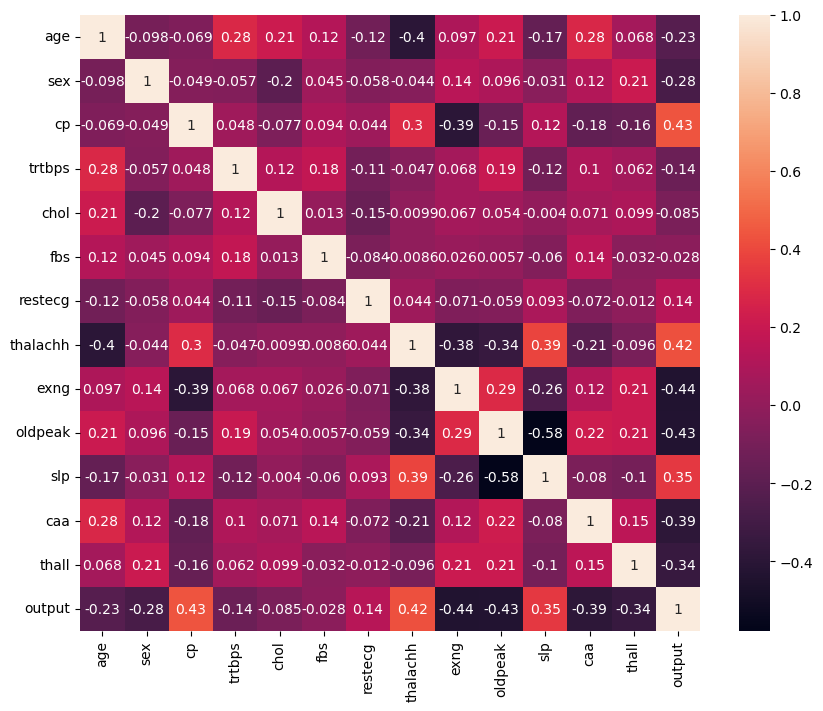

In [406]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

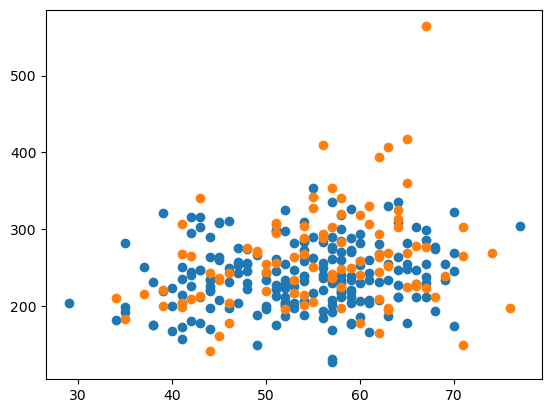

In [407]:
h = df[df['sex']==1]
m = df[df['sex']==0]
plt.scatter(h['age'],h['chol'])
plt.scatter(m['age'],m['chol'])

In [408]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test = train_test_split(df, test_size = 0.2,random_state=42)

In [409]:
y_train = x_train["output"].copy()
x_train = x_train.drop(["output"],axis=1)

y_test = x_test["output"].copy()
x_test = x_test.drop(["output"],axis=1)

In [410]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "SGDClassifier":SGDClassifier(),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

In [411]:

from sklearn.metrics import precision_score, recall_score


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    print(f"{name} Recall: {recall:.2f}")
    precission = precision_score(y_test, y_pred)
    print(f"{name} Recall: {precission:.2f}")

SGDClassifier Recall: 0.03
SGDClassifier Recall: 1.00
Logistic Regression Recall: 0.91
Logistic Regression Recall: 0.88
Decision Tree Recall: 0.78
Decision Tree Recall: 0.89
Random Forest Recall: 0.84
Random Forest Recall: 0.84
SVM Recall: 0.88
SVM Recall: 0.67
KNN Recall: 0.75
KNN Recall: 0.69
Gradient Boosting Recall: 0.75
Gradient Boosting Recall: 0.80
XGBoost Recall: 0.78
XGBoost Recall: 0.86
AdaBoost Recall: 0.75
AdaBoost Recall: 0.86
Naive Bayes Recall: 0.84
Naive Bayes Recall: 0.90
MLP Neural Network Recall: 0.91
MLP Neural Network Recall: 0.88


In [412]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

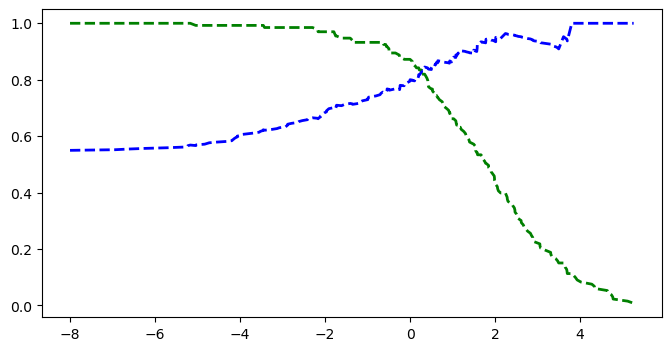

In [413]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(model, x_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

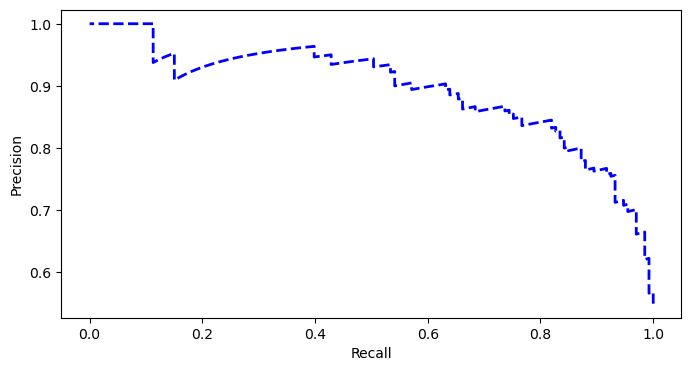

In [414]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [415]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


datos_prueba =  x_test
p = model.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_test
print("R2 SCORE:",r2_score(y_test, y_pred))

model_score = cross_val_score(model, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=3)
root_lin_score = np.sqrt(-model_score)
predicciones=model.predict(x_test)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)

print(f"MEDIA DE ERROR AL CUADRADO: {mse} -- ERROR ABSOLUTO: {mae}")
print("MEDIA AL CUADRADO:",root_lin_score.mean())
print("ABSOLUTO AL CUADRADO:",root_lin_score.std())
print("CROSS SCORE",root_lin_score)
print("Reales: ", list(y_reales))

PREDICCIONES:  [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
R2 SCORE: 0.5398706896551724
MEDIA DE ERROR AL CUADRADO: 0.3387537429470791 -- ERROR ABSOLUTO: 0.11475409836065574
MEDIA AL CUADRADO: 0.4381779375108767
ABSOLUTO AL CUADRADO: 0.04508898856055437
CROSS SCORE [0.43033148 0.49690399 0.38729833]
Reales:  [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [416]:
diferentes=0
for index,i in enumerate(p):
    if i != list(y_reales)[index]:
        diferentes+=1
print("FALLA EN:",diferentes)

FALLA EN: 7
